<a href="https://colab.research.google.com/github/Cassi686/Cassi686/blob/main/Ex_Reg_Lin_Simpl_SKLEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_excel('/content/C├│pia_de_aprovacao_alunos[1].xlsx')
df.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [ ]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


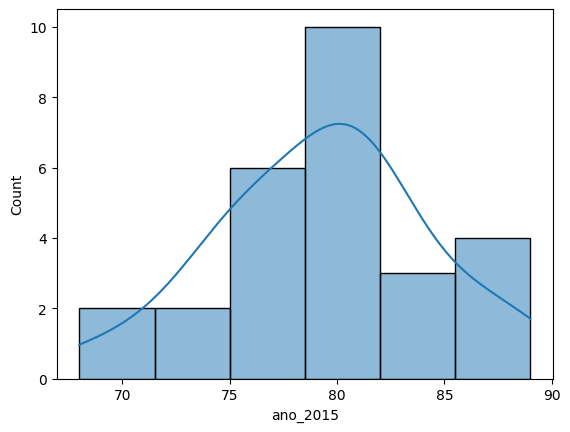

In [ ]:
sns.histplot(df,x='ano_2015', kde=True);

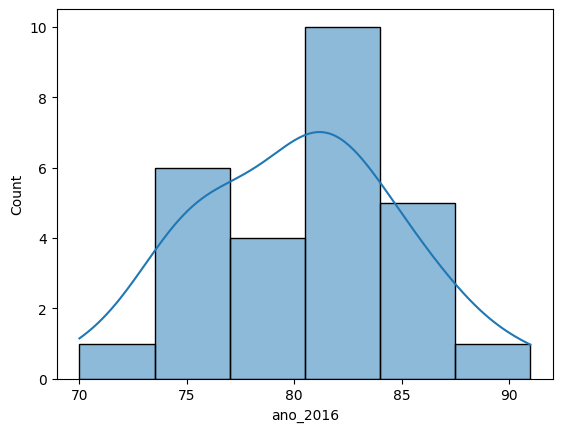

In [ ]:
sns.histplot(df,x='ano_2016', kde=True);

In [ ]:
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


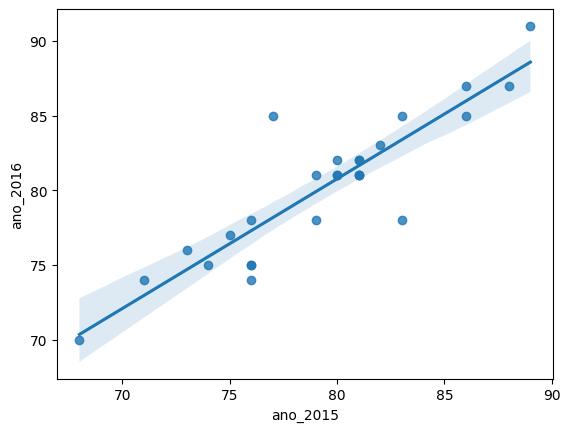

In [ ]:
sns.regplot(x='ano_2015', y='ano_2016', data = df);

In [ ]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_norm= pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [ ]:
df_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [ ]:
df_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


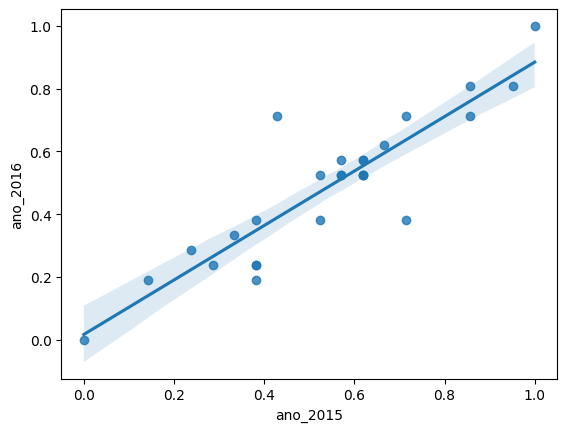

In [ ]:
sns.regplot(x='ano_2015',y='ano_2016', data = df_norm);

In [ ]:
import statsmodels.formula.api as smf


In [ ]:
function= 'ano_2015~ano_2016'
model = smf.ols(formula=function, data = df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2015   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Thu, 04 May 2023   Prob (F-statistic):           3.02e-10
Time:                        15:50:32   Log-Likelihood:                 22.904
No. Observations:                  27   AIC:                            -41.81
Df Residuals:                      25   BIC:                            -39.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0922      0.049      1.874      0.0

In [ ]:
x = df_norm[['ano_2015']]
y = df_norm[['ano_2016']]

In [ ]:
x_treino,x_teste,y_treino,y_teste  = train_test_split(x,y, test_size=0.2,random_state= 42)

lr= LinearRegression()

lr.fit(x_treino,y_treino)

LinearRegression()

In [ ]:
r_sq= lr.score(x_treino, y_treino)
print(r_sq)

0.8800910056640281


In [ ]:
y_pred_treino = lr.predict(x_treino)
print('MAE:',metrics.mean_absolute_error(y_treino,y_pred_treino))
print('MSE:',metrics.mean_squared_error(y_treino,y_pred_treino))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_treino,y_pred_treino)))

MAE: 0.06313092719197842
MSE: 0.006947385853516443
RMSE: 0.08335097991935334


In [ ]:
lr.fit(x_teste,y_teste)

LinearRegression()

In [ ]:
y_pred_teste = lr.predict(x_teste)
print('MAE:',metrics.mean_absolute_error(y_teste,y_pred_teste))
print('MSE:',metrics.mean_squared_error(y_teste,y_pred_teste))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_teste,y_pred_teste)))

MAE: 0.08998515473335626
MSE: 0.014620503143970094
RMSE: 0.12091527258361573
